You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:
$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.
$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [240]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin

In [241]:
m_df = pd.read_csv('men_results.csv')
w_df = pd.read_csv('women_results.csv')
m_df['date'] = pd.to_datetime(m_df['date'])
w_df['date'] = pd.to_datetime(w_df['date'])

In [242]:
a = 0.1
# Ha = w_m > m_m

In [243]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  4884 non-null   int64         
 1   date        4884 non-null   datetime64[ns]
 2   home_team   4884 non-null   object        
 3   away_team   4884 non-null   object        
 4   home_score  4884 non-null   int64         
 5   away_score  4884 non-null   int64         
 6   tournament  4884 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 267.2+ KB


In [244]:
m_condition = (m_df['date']>=pd.to_datetime('2002-01-01'))
n_m_df = m_df[m_condition].query('tournament=="FIFA World Cup"')
n_m_df.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup


In [245]:
w_condition = (w_df['date']>=pd.to_datetime('2002-01-01'))
n_w_df = w_df[w_condition].query('tournament=="FIFA World Cup"')
n_w_df.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup


In [246]:
n_m_df['all_goals'] = n_m_df['home_score'] + n_m_df['away_score']
n_m_df.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,all_goals
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1


In [247]:
n_w_df['all_goals'] = n_w_df['home_score'] + n_w_df['away_score']
n_w_df.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,all_goals
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4


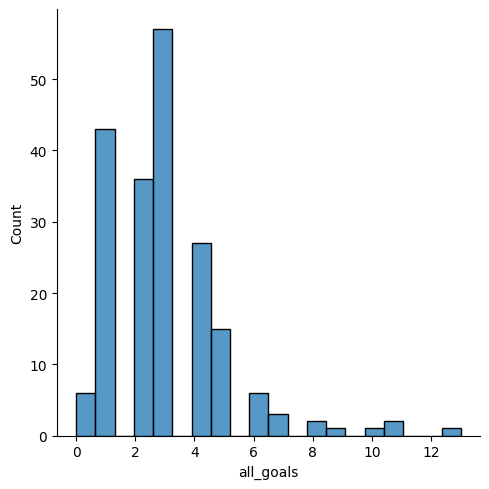

In [248]:
sns.displot(data=n_w_df,
            x='all_goals',
            bins=20)
plt.show()

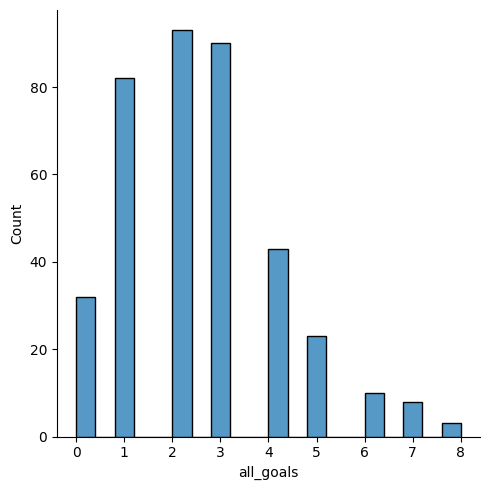

In [249]:
sns.displot(data=n_m_df,
            x='all_goals',
            bins=20)
plt.show()

In [250]:
n_df = pd.DataFrame({
    'men':n_m_df['all_goals'],
    'women':n_w_df['all_goals']
})
n_df.head()

,men,women
1600,NaN,3.0
1601,NaN,2.0
1602,NaN,5.0
1603,NaN,6.0
1604,NaN,4.0


In [251]:
wmw_test = pingouin.mwu(
    x=n_df['women'],
    y=n_df['men'],
    alternative='greater'
)
p_val = wmw_test['p-val'].values[0]

if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

In [252]:
result_dict = {'p_val':p_val, 
               'result':result}
result_dict

{'p_val': 0.005106609825443641, 'result': 'reject'}

In [253]:
un_t = pingouin.ttest(
    x=n_df['women'],
    y=n_df['men'],
    alternative='greater',
)
un_t['p-val']

T-test    0.002598
Name: p-val, dtype: float64

In [1]:
result_dict = {'p_val':0.002598, 
               'result':'reject'}
result_dict

{'p_val': 0.002598, 'result': 'reject'}